
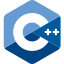
<br>

<div style="text-align:center; font-size:200%;">
 <b>Slicing</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 04 Slicing.ipynb -->
<!-- slides/module_170_oop/topic_140_slicing.cpp -->


- Slicing tritt auf, wenn ein Objekt einer abgeleiteten Klasse in ein Objekt
  der Basisklasse kopiert wird.
- Nur die Attribute der Basisklasse werden kopiert.
- Die Attribute der abgeleiteten Klasse gehen verloren.
- Slicing kann auch auftreten, wenn ein Objekt einer abgeleiteten Klasse als
  "by value" Argument an eine Funktion übergeben wird, die ein Objekt der
  Basisklasse erwartet.

In [ ]:
#include <iostream>

In [ ]:
class BaseV1 {
public:
    int x;
    BaseV1(int x) : x{x} {}
    virtual ~BaseV1() = default;

    virtual void print() const {
        std::cout << "BaseV1::print(): x = " << x << "\n";
    }
};

In [ ]:
class DerivedV1 : public BaseV1 {
public:
    int y;
    DerivedV1(int x, int y) : BaseV1{x}, y{y} {}

    void print() const override {
        std::cout << "DerivedV1::print(): x = " << x << ", y = " << y << "\n";
    }
};

In [ ]:
BaseV1 b{1};
b.print();

In [ ]:
DerivedV1 d{2, 3};
d.print();

In [ ]:
BaseV1 b2 = d;
b2.print();

In [ ]:
void print_base(BaseV1 b) {
    b.print();
}

In [ ]:
print_base(d);

In [ ]:
void print_base_ref(const BaseV1& b) {
    b.print();
}

In [ ]:
print_base_ref(d);


- Slicing kann vermieden werden, indem ein Zeiger oder eine Referenz auf die
  Basisklasse verwendet wird.
- Um versehentliches Slicing zu vermeiden ist es empfehlenswert, die
  Copy-Konstruktoren und Zuweisungsoperatoren der Klassen zu löschen.
- Eine andere Möglichkeit ist, eine abstrakte Basisklasse zu definieren.

In [ ]:
#include <iostream>

In [ ]:
class BaseV2 {
public:
    int x;
    BaseV2(int x) : x{x} {}
    virtual ~BaseV2() = default;
    BaseV2(const BaseV2&) = delete;
    BaseV2& operator=(const BaseV2&) = delete;
    BaseV2(BaseV2&&) = delete;
    BaseV2& operator=(BaseV2&&) = delete;

    virtual void print() const {
        std::cout << "BaseV2::print(): x = " << x << "\n";
    }
};

In [ ]:
class DerivedV2 : public BaseV2 {
public:
    int y;
    DerivedV2(int x, int y) : BaseV2{x}, y{y} {}

    void print() const override {
        std::cout << "DerivedV2::print(): x = " << x << ", y = " << y << "\n";
    }
};

In [ ]:
BaseV2 b{1};
b.print();

In [ ]:
DerivedV2 d{2, 3};
d.print();

In [ ]:
// BaseV2 b2 = d;

In [ ]:
void print_base(BaseV2 b) {
    b.print();
}

In [ ]:
// print_base(d);

In [ ]:
void print_base_ref(const BaseV2& b) {
    b.print();
}

In [ ]:
print_base_ref(d);

In [ ]:
std::unique_ptr<BaseV2> pb{std::make_unique<DerivedV2>(1, 2)};

In [ ]:
print_base_ref(*pb)


## Mini-Workshop: Zoo

In diesem Workshop wollen wir ein System zur Verwaltung eines Zoos
implementieren. Dazu definieren wir eine Klassenhierarchie für Tiere im Zoo.

In dieser Aufgabe konzentrieren wir uns auf die Funktion
`print_food_requirements()`, die ausgibt, welches Futter wir für ein Tier
brauchen.

Einer Ihrer Kollegen hat das im Folgenden angegebene Programmgerüst
entwickelt.


Die gewünschte Ausgabe des Programms ist:

```
Elephant needs the following food:
  hay
  fruit
  vegetables
Zebra needs the following food:
  hay
  grass
Lion needs the following food:
  meat
```


- Ergänzen Sie die Klassenhierarchie um die Klassen `Elephant`, `Zebra` und
  `Lion`.
  - Verwenden Sie dabei die Funktion `print_food_requirements` aus der
    Basisklasse.
- Die Ausgabe des Programms ist nicht korrekt. Warum?
- Modifizieren Sie die Klasse `Animal` so, dass die fehlerhafte Anweisung zu
  einem Compilezeit-Fehler führt.
- Korrigieren Sie den Fehler.

In [ ]:
#include <iostream>
#include <memory>
#include <string>
#include <vector>

In [ ]:
class Animal {
public:
    Animal(const std::string& name) : name{name} {}
    virtual ~Animal() = default;

    virtual void print_food_requirements() const
    {
        std::cout << name << " needs the following food: \n";
    }

protected:
    std::string name;
};

In [ ]:
#include <vector>

In [ ]:
using Animals = std::vector<Animal>;

In [ ]:
Animals make_animals()
{
    std::vector<Animal> res{};
    res.push_back(Elephant{});
    res.push_back(Zebra{});
    res.push_back(Lion{});
    return res;
}

In [ ]:
auto animals = make_animals();

In [ ]:
for (const auto& animal : animals) {
    animal.print_food_requirements();
}